# Company Delivery

### Importing Required Packages

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


## Importing the data

In [162]:
df = pd.read_csv("failure.csv")

## EDA - Exploratory Data Analysis

In [163]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [164]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [166]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [167]:
# imbalanced data 
df.failure.value_counts()   

failure
0    124388
1       106
Name: count, dtype: int64

<Axes: xlabel='failure', ylabel='Count'>

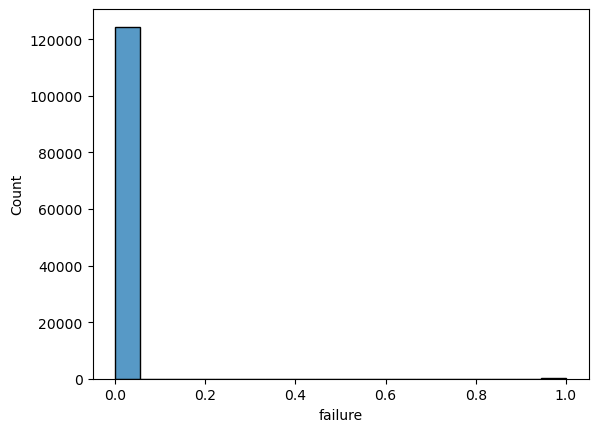

In [168]:
sns.histplot(df.failure)

In [169]:
df.date.unique()

array(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
       '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
       '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
       '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
       '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
       '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
       '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01',
       '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05',
       '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
       '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
       '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
       '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
       '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
       '2015-02-26', '2015-02-27', '2015-02-28', '2015-03-01',
       '2015-03-02', '2015-03-03', '2015-03-04', '2015-

In [170]:
df.device.unique()

array(['S1F01085', 'S1F0166B', 'S1F01E6Y', ..., 'S1F02W1L', 'S1F02XLX',
       'S1F03499'], dtype=object)

In [171]:
df['date'] = pd.to_datetime(df['date'])

In [172]:
df['day'] = (df['date']).dt.day.astype('category')
df['month'] = (df['date']).dt.month.astype('category')
df['year'] = (df['date']).dt.year.astype('category')

In [173]:
del df['date']

In [174]:
df.sample(10)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
15696,Z1F0MP8Q,0,164831640,0,0,1,7,256614,0,0,0,18,1,2015
21963,W1F18TKX,0,140796160,0,0,0,11,211242,0,0,0,27,1,2015
120990,W1F0JH87,0,233990080,0,1,0,9,330730,0,0,0,27,9,2015
54404,W1F0Z588,0,73951576,0,0,0,7,253841,0,0,0,15,3,2015
83436,Z1F0LLPS,0,16552872,0,0,0,10,476442,0,0,0,19,5,2015
8406,Z1F1AD0M,0,42624968,0,0,1,21,228301,0,0,0,8,1,2015
3036,W1F0VZFH,0,70902872,0,0,2,10,361249,0,0,9,3,1,2015
108532,W1F0FZPA,0,234787096,0,0,0,13,290402,0,0,0,31,7,2015
92726,S1F11KQW,0,133441992,0,0,0,7,226137,0,0,0,15,6,2015
29841,W1F1CKXZ,0,156586312,104,0,0,12,236974,0,0,0,7,2,2015


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   device      124494 non-null  object  
 1   failure     124494 non-null  int64   
 2   attribute1  124494 non-null  int64   
 3   attribute2  124494 non-null  int64   
 4   attribute3  124494 non-null  int64   
 5   attribute4  124494 non-null  int64   
 6   attribute5  124494 non-null  int64   
 7   attribute6  124494 non-null  int64   
 8   attribute7  124494 non-null  int64   
 9   attribute8  124494 non-null  int64   
 10  attribute9  124494 non-null  int64   
 11  day         124494 non-null  category
 12  month       124494 non-null  category
 13  year        124494 non-null  category
dtypes: category(3), int64(10), object(1)
memory usage: 10.8+ MB


In [176]:
df.year.unique()

[2015]
Categories (1, int32): [2015]

In [177]:
# drop year and device column as it is not useful
df.drop(['year','device'],axis=1,inplace=True)


In [178]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [179]:
x = df.drop('failure', axis=1)
y = df['failure']

In [180]:
x = pd.get_dummies(x, drop_first=True)

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [183]:
len(x.columns)

49

In [186]:
x.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,215630672,56,0,52,6,407438,0,0,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,61370680,0,3,0,6,403174,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,173295968,0,0,0,12,237394,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,79694024,0,0,0,6,410186,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,135970480,0,0,0,15,313173,0,0,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [188]:
y.value_counts()

failure
0    124388
1    124388
Name: count, dtype: int64

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')
        
        
       

In [185]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[24629 20715]
 [  123  4289]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.54      0.70     45344
           1       0.17      0.97      0.29      4412

    accuracy                           0.58     49756
   macro avg       0.58      0.76      0.50     49756
weighted avg       0.92      0.58      0.67     49756

Accuracy Score:
 0.5811962376396816
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[24505  1555]
 [  247 23449]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     26060
           1       0.94      0.99      0.96     23696

    accuracy                           0.96     49756
   macro avg       0.96      0.96      0.96     49756
weighted avg       0.97      0.96      0.96     49756

Accuracy Score:
 0.9637832623201222
****************